In [2]:
# dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/MyDrive/Colab Notebooks/FINA5240/Lecture3/'
path_folder = '/content/drive/MyDrive/Colab Notebooks/FINA5240/Lecture3/'

Mounted at /content/drive/
market_franchise_revenue2.csv  Student_Workbook_FeatureEngineering.ipynb
movies.csv		       Student_Workbook_Model_Stock_Market.ipynb


# Case 1: Market Franchise Rating

In [4]:
df = pd.read_csv(path_folder + "market_franchise_revenue2.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

# Numeric Aggregations

In [6]:
# Numeric aggregations
grouped_df = df.groupby('Branch')
df[['tax_branch_mean', 'unit_price_mean']] = grouped_df[['Tax 5%', 'Unit price']].transform('mean')
df[['tax_branch_std', 'unit_price_std']] = grouped_df[['Tax 5%', 'Unit price']].transform('std')
df[['product_count', 'gender_count']] = grouped_df[['Product line', 'Gender']].transform('count') # not unique values

In [7]:
df[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,A,14.874001,54.757729,11.030477,26.167271,340,340
1,C,16.052367,56.609024,12.531470,27.179799,328,328
2,A,14.874001,54.757729,11.030477,26.167271,340,340
3,A,14.874001,54.757729,11.030477,26.167271,340,340
4,A,14.874001,54.757729,11.030477,26.167271,340,340
5,C,16.052367,56.609024,12.531470,27.179799,328,328
6,A,14.874001,54.757729,11.030477,26.167271,340,340
7,C,16.052367,56.609024,12.531470,27.179799,328,328
8,A,14.874001,54.757729,11.030477,26.167271,340,340
9,B,15.232024,55.565438,11.545122,26.208379,332,332


In [8]:
# Flag it!
# df['unit_price_50'] = np.where(df['Unit price'] > 50, 1, 0)
df['unit_price_50'] = df['Unit price'].apply(lambda x: 1 if x > 50 else 0)
df['unit_price_50 * qty'] = df['unit_price_50'] * df['Quantity']

In [9]:
df[['unit_price_50', 'unit_price_50 * qty']].head()

,unit_price_50,unit_price_50 * qty
0,1,7.0
1,0,0.0
2,0,0.0
3,1,8.0
4,1,7.0


# Numeric Transformations

In [10]:
# numeric transformations
df['log_cogs'] = np.log(df['cogs'] + 1)
#df['gross income squared'] = np.square(df['gross income'])

In [11]:
df[['cogs', 'log_cogs', 'gross income']].head()

,cogs,log_cogs,gross income
0,522.83,6.261167,26.1415
1,76.40,4.348987,3.8200
2,324.31,5.784779,16.2155
3,465.76,6.145815,23.2880
4,604.17,6.405509,30.2085


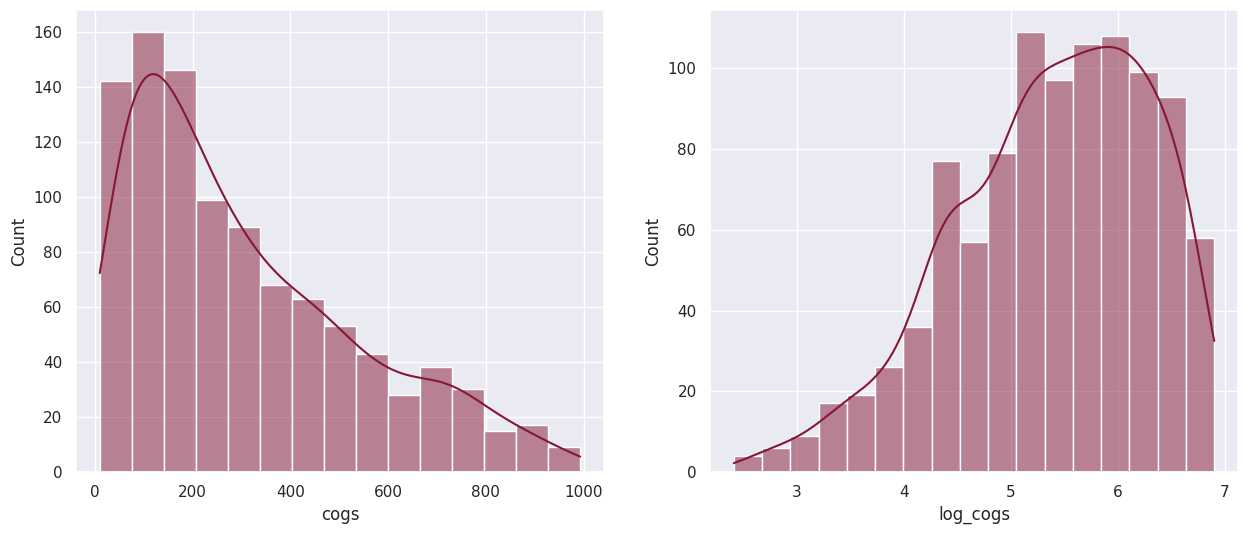

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['cogs'], ax=ax1, kde=True)
sns.histplot(df['log_cogs'], ax=ax2, kde=True);

# Numeric Scaling

In [13]:
def plot_hist(data1, data2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data1, ax=ax1, kde=True)
    sns.histplot(data2, ax=ax2, kde=True);

Gross income range: 0.5085 to 49.65
Rating range: 4.0 to 10.0


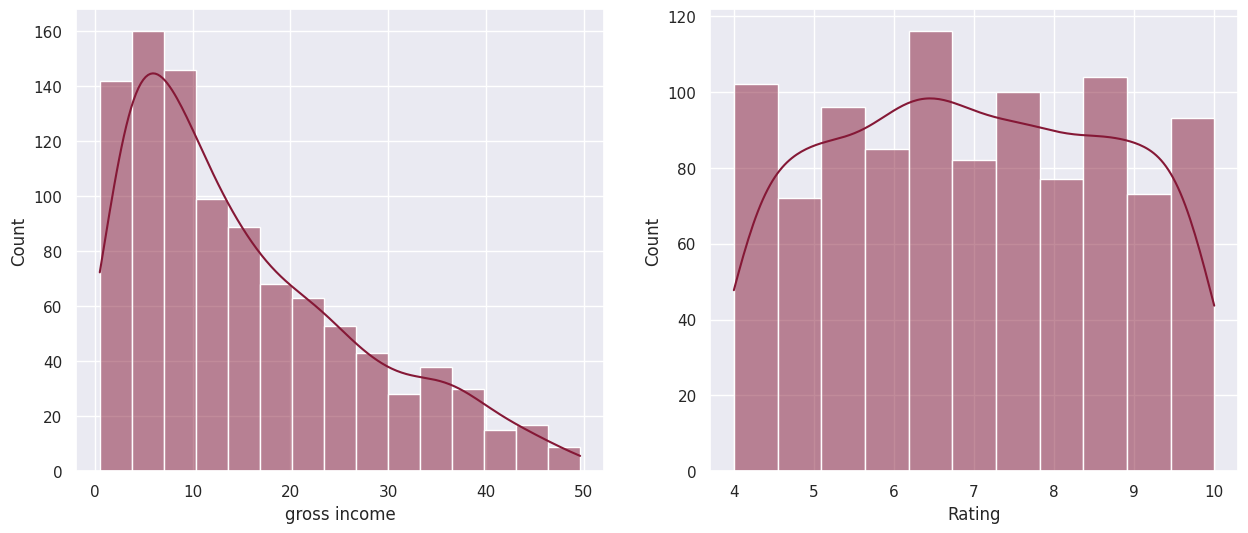

In [14]:
gincome = df["gross income"]
rating = df["Rating"]

print(f'Gross income range: {gincome.min()} to {gincome.max()}')
print(f'Rating range: {rating.min()} to {rating.max()}')

plot_hist(gincome, rating)

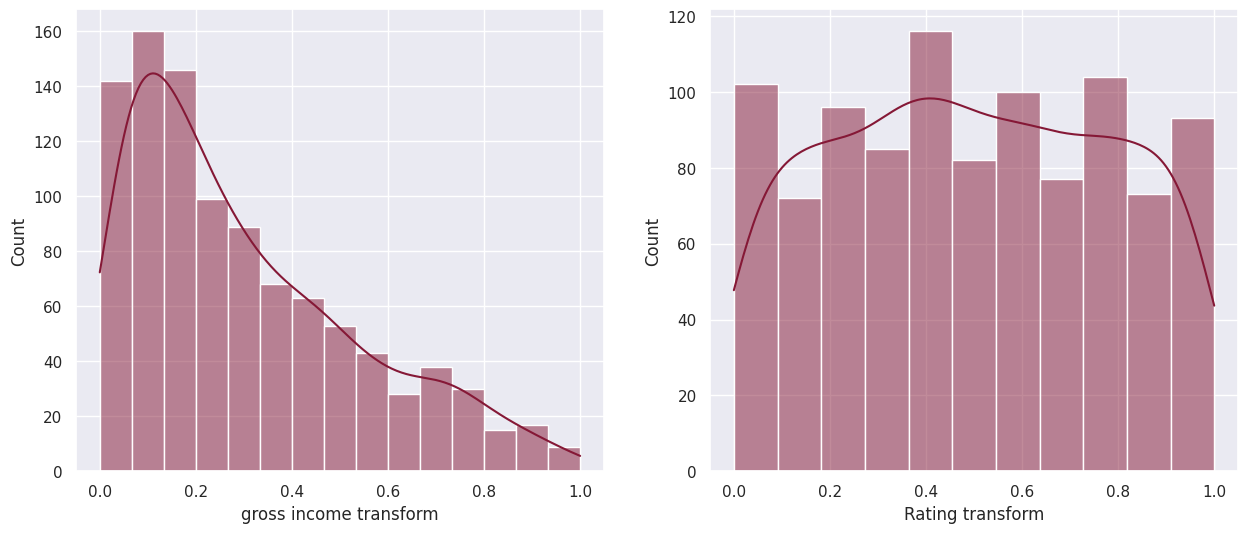

In [15]:
df[["gross income transform", "Rating transform"]] = MinMaxScaler().fit_transform(df[["gross income", "Rating"]])

plot_hist(df['gross income transform'], df['Rating transform'])

# Categorical Variable Handling

## One-hot encoding

In [16]:
pd.get_dummies(df[['Gender', 'Payment']]).head()

,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,1
1,1,0,1,0,0
2,0,1,0,1,0
3,0,1,0,0,1
4,0,1,0,0,1


In [17]:
# Get dummies and concatenate to the original df
df = pd.concat([df, pd.get_dummies(df[['Gender', 'Payment']])], axis=1)
# Drop original 'Gender' and 'Payment' columns
df.drop(['Gender', 'Payment'], axis=1, inplace=True)

# Missing Value Handling

<Axes: >

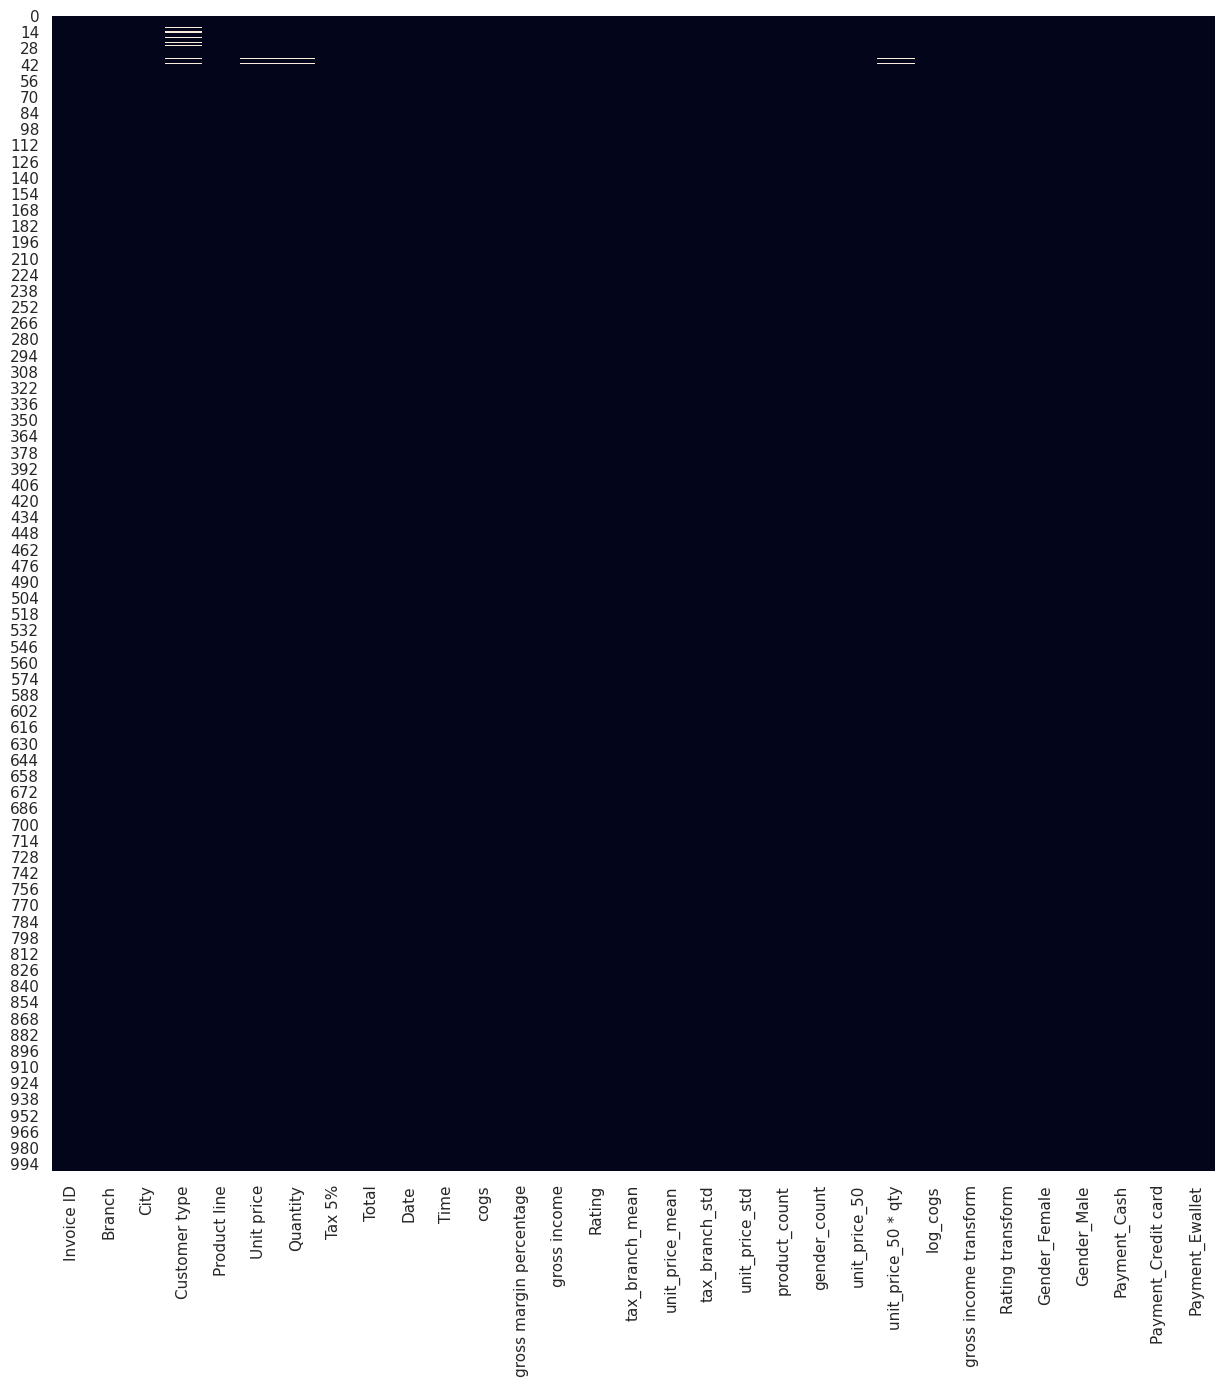

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False)

We see there are missing values in a few columns - Customer type, a categorical column, having the most missing values. Usually, columns with too many missing values don't provide enough signal for prediction - so some practitioners decide to remove those columns by setting a threshold for "missingness". In the below code chunk we set the threshold to be 70% and remove columns and rows that meet these conditions.

I do not recommend this strategy - there may still be useful information in these columns/rows and I would let the feature selection process decide whether or not to keep/remove columns. Regardless, if you simply want to build a quick baseline model you may employ this strategy.

Here's how you might remove missing values for a certain threshold:

In [19]:
threshold = 0.3

# Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

# Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

Alternatively (preferably), we can impute missing values with a single value such as the mean or median of the column. For categorical columns, we could impute missing values with the mode, or most frequent category in the column.

This line of code fills the missing values (NaNs) in a Pandas DataFrame (df) with the mode of each categorical column. The mode is the value that appears most frequently in a data set. Here's a breakdown of the code:

**df.apply()**: This function is used to apply a specific function along the DataFrame's columns or rows. In this case, the lambda function is applied to each column.

**lambda x**: x.fillna(): This is a lambda function that takes a column (x) as input and fills its missing values with the specified value. In this case, the mode of the column is used as the value.

**x.value_counts()**: This function computes the frequency of each unique value in the column (x). It returns a Series sorted by value frequency in descending order.



In [20]:
# Filling missing values with medians of the columns
df = df.fillna(df.median())

# Fill remaining columns - categorical columns - with mode
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

<ipython-input-20-f83ae3f3208f>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


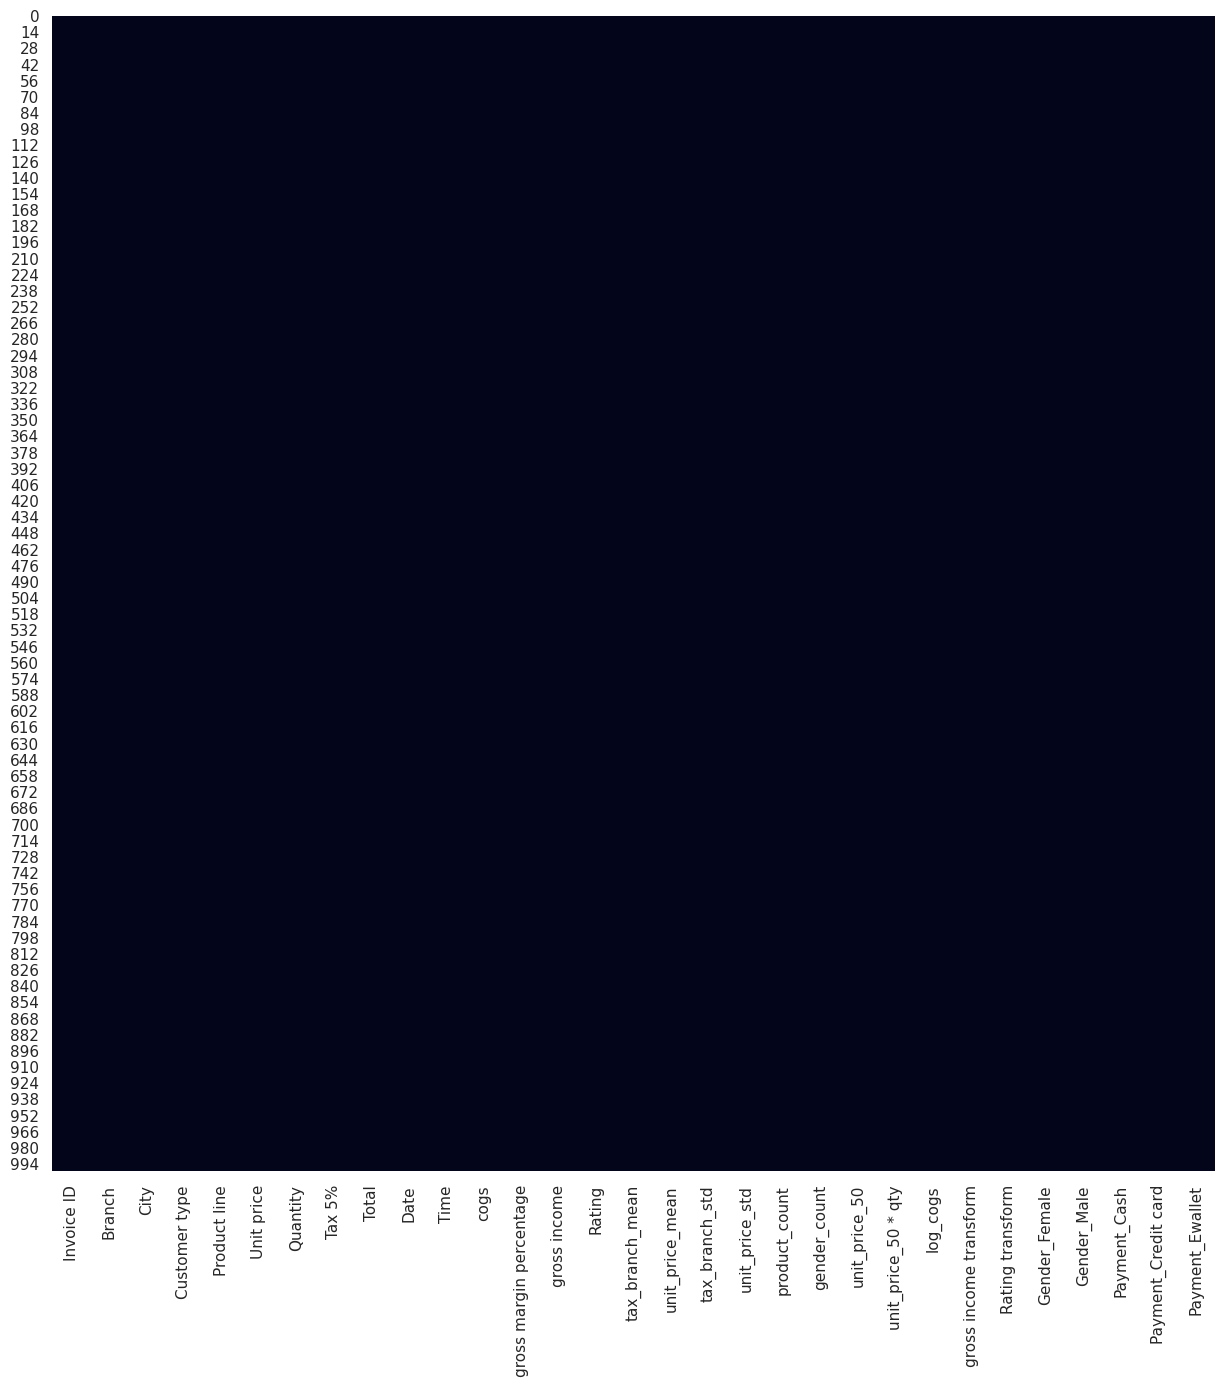

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

In [22]:
df.head()

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,unit_price_50,unit_price_50 * qty,log_cogs,gross income transform,Rating transform,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,...,1,7.0,6.261167,0.521616,0.850000,1,0,0,0,1
1,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,...,0,0.0,4.348987,0.067387,0.933333,1,0,1,0,0
2,631-41-3108,A,Yangon,Normal,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,...,0,0.0,5.784779,0.319628,0.566667,0,1,0,1,0
3,123-19-1176,A,Yangon,Member,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,...,1,8.0,6.145815,0.463549,0.733333,0,1,0,0,1
4,373-73-7910,A,Yangon,Normal,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,...,1,7.0,6.405509,0.604377,0.216667,0,1,0,0,1


# Date-Time Decomposition

In [23]:
# Convert to datetime object
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [24]:
# Decomposition
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df[['Year','Month','Day']].head()

,Year,Month,Day
0,2019,1,5
1,2019,3,8
2,2019,3,3
3,2019,1,27
4,2019,2,8


In [25]:
df['Year_to_present'] = 2023 - df['Year']
df['Month_to_Christmas_month'] = 12 - df['Month']

In [26]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'tax_branch_mean',
       'unit_price_mean', 'tax_branch_std', 'unit_price_std', 'product_count',
       'gender_count', 'unit_price_50', 'unit_price_50 * qty', 'log_cogs',
       'gross income transform', 'Rating transform', 'Gender_Female',
       'Gender_Male', 'Payment_Cash', 'Payment_Credit card', 'Payment_Ewallet',
       'Year', 'Month', 'Day', 'Year_to_present', 'Month_to_Christmas_month'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Compute correlations with 'gross income'
correlations = df.corr()['gross income'].abs().sort_values(ascending=False)

# Get top 11 correlated features (including 'gross income')
top_features = correlations.index[:11].tolist()

# We remove 'gross income' as it's our target variable
top_features.remove('gross income')

print(f"Selected Features: {top_features}")

features = df[top_features]

Selected Features: ['Tax 5%', 'gross income transform', 'cogs', 'Total', 'log_cogs', 'unit_price_50 * qty', 'Quantity', 'Unit price', 'unit_price_50', 'Gender_Male']


<ipython-input-28-811b1b3d6d1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['gross income'].abs().sort_values(ascending=False)


In [29]:
# Assuming df is your dataframe
target = df['gross income']

# Perform Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [30]:
X_train

,Tax 5%,gross income transform,cogs,Total,log_cogs,unit_price_50 * qty,Quantity,Unit price,unit_price_50,Gender_Male
541,3.7940,0.066858,75.88,79.6740,4.342246,1.0,1.0,75.88,1,1
440,4.3600,0.078376,87.20,91.5600,4.479607,0.0,5.0,17.44,0,1
482,9.2850,0.178597,185.70,194.9850,5.229503,0.0,5.0,37.14,0,1
422,48.6050,0.978735,972.10,1020.7050,6.880487,10.0,10.0,97.21,1,0
778,6.3125,0.118108,126.25,132.5625,4.846154,0.0,5.0,25.25,0,1
...,...,...,...,...,...,...,...,...,...,...
106,8.2140,0.156802,164.28,172.4940,5.107641,0.0,6.0,27.38,0,1
270,16.8575,0.332692,337.15,354.0075,5.823490,5.0,5.0,67.43,1,0
860,4.3135,0.077429,86.27,90.5835,4.469007,1.0,1.0,86.27,1,0
435,44.6580,0.898416,893.16,937.8180,6.795885,9.0,9.0,99.24,1,1


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Perform Train/Test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_preds)

print(f"Decision Tree MAE: {dt_mae}")


Decision Tree MAE: 0.04952666666666667


In [32]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
print(f"Random Forest MAE: {rf_mae}")

Random Forest MAE: 0.03407331666666632


## Another two techniques often used

### MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming df is your dataframe
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


In [34]:
X_train_scaled

,Tax 5%,gross income transform,cogs,Total,log_cogs,unit_price_50 * qty,Quantity,Unit price,unit_price_50,Gender_Male
0,0.065244,0.065244,0.065244,0.065244,0.409183,0.1,0.000000,0.732087,1.0,1.0
1,0.076822,0.076822,0.076822,0.076822,0.440931,0.0,0.444444,0.081887,0.0,1.0
2,0.177568,0.177568,0.177568,0.177568,0.614250,0.0,0.444444,0.301068,0.0,1.0
3,0.981896,0.981896,0.981896,0.981896,0.995834,1.0,1.000000,0.969404,1.0,0.0
4,0.116763,0.116763,0.116763,0.116763,0.525649,0.0,0.444444,0.168781,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
695,0.155660,0.155660,0.155660,0.155660,0.586085,0.0,0.555556,0.192479,0.0,1.0
696,0.332471,0.332471,0.332471,0.332471,0.751535,0.5,0.444444,0.638073,1.0,0.0
697,0.075871,0.075871,0.075871,0.075871,0.438481,0.1,0.000000,0.847686,1.0,0.0
698,0.901157,0.901157,0.901157,0.901157,0.976280,0.9,0.888889,0.991989,1.0,1.0


### Principle-Componenet-Analysis Dimension Reduction
PCA is linear transformation.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_train)

# Convert the PCA result into a dataframe
df_pca = pd.DataFrame(df_pca, columns=['Principal Component 1', 'Principal Component 2'])


In [36]:
df_pca

,Principal Component 1,Principal Component 2
0,-332.376321,37.392285
1,-318.869810,-21.931009
2,-175.163481,-9.387742
3,967.424350,-6.087560
4,-261.897739,-16.958118
...,...,...
695,-206.680664,-17.645726
696,45.839721,10.048589
697,-316.803711,46.982475
698,853.128312,1.644468


### Slight modification for convenience


In [37]:
num_components = 5
pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(X_train)
df_pca = pd.DataFrame(df_pca, columns=[f'Principal Component {i}' for i in range(1, num_components+1)])


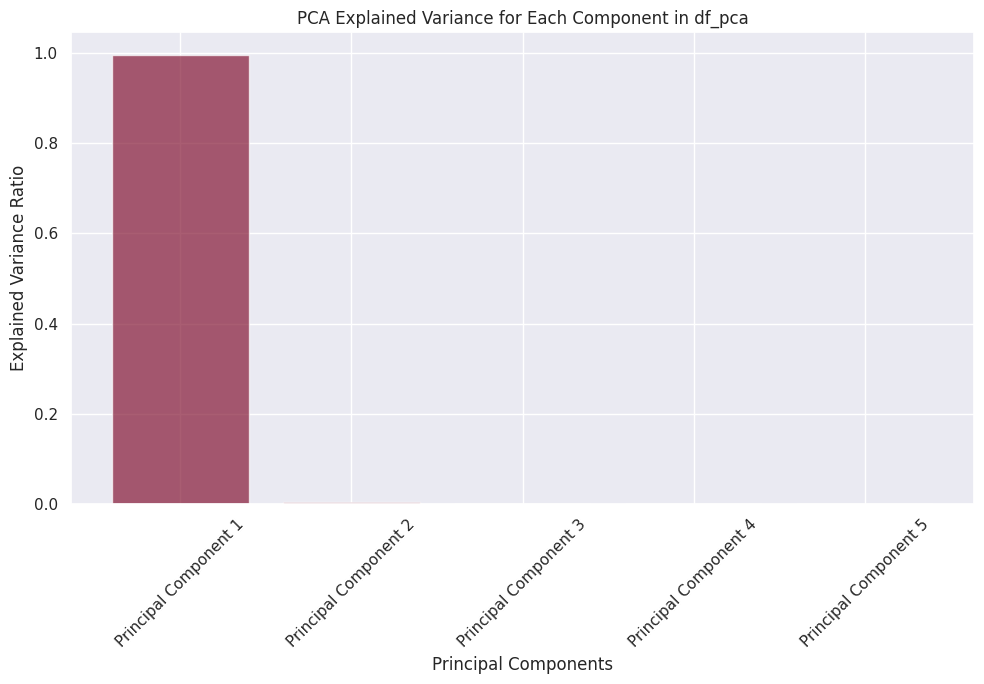

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Individual explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting for the specific df_pca DataFrame
plt.figure(figsize=(10, 7))
plt.bar(df_pca.columns, explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance for Each Component in df_pca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






----------------------------



# Case 2: Box office example

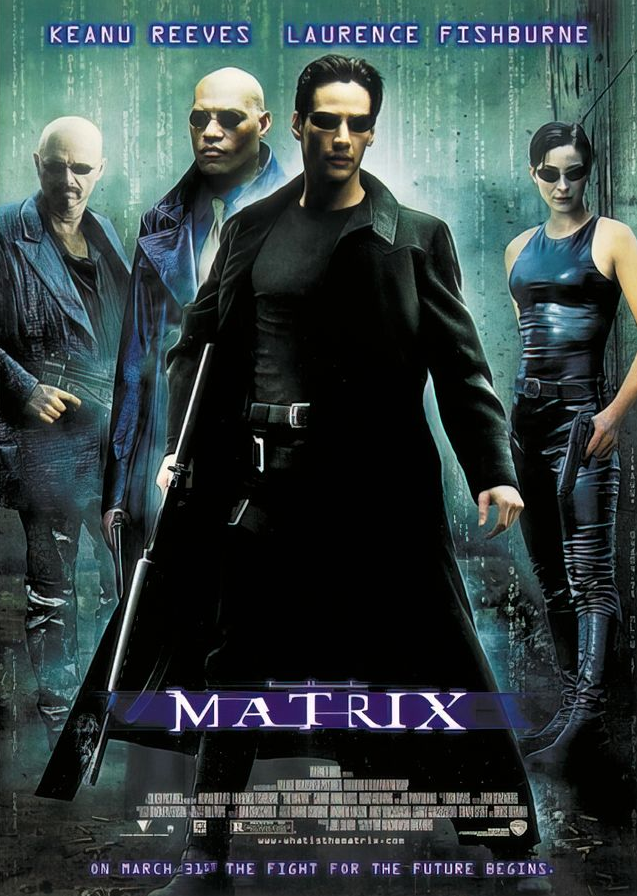

In [39]:
df = pd.read_csv(path_folder + 'movies.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Filling missing values
First, let's handle missing values. We visualize them using Seaborn and then fill in numeric missing values with the median and categorical missing values with the mode.



<Axes: >

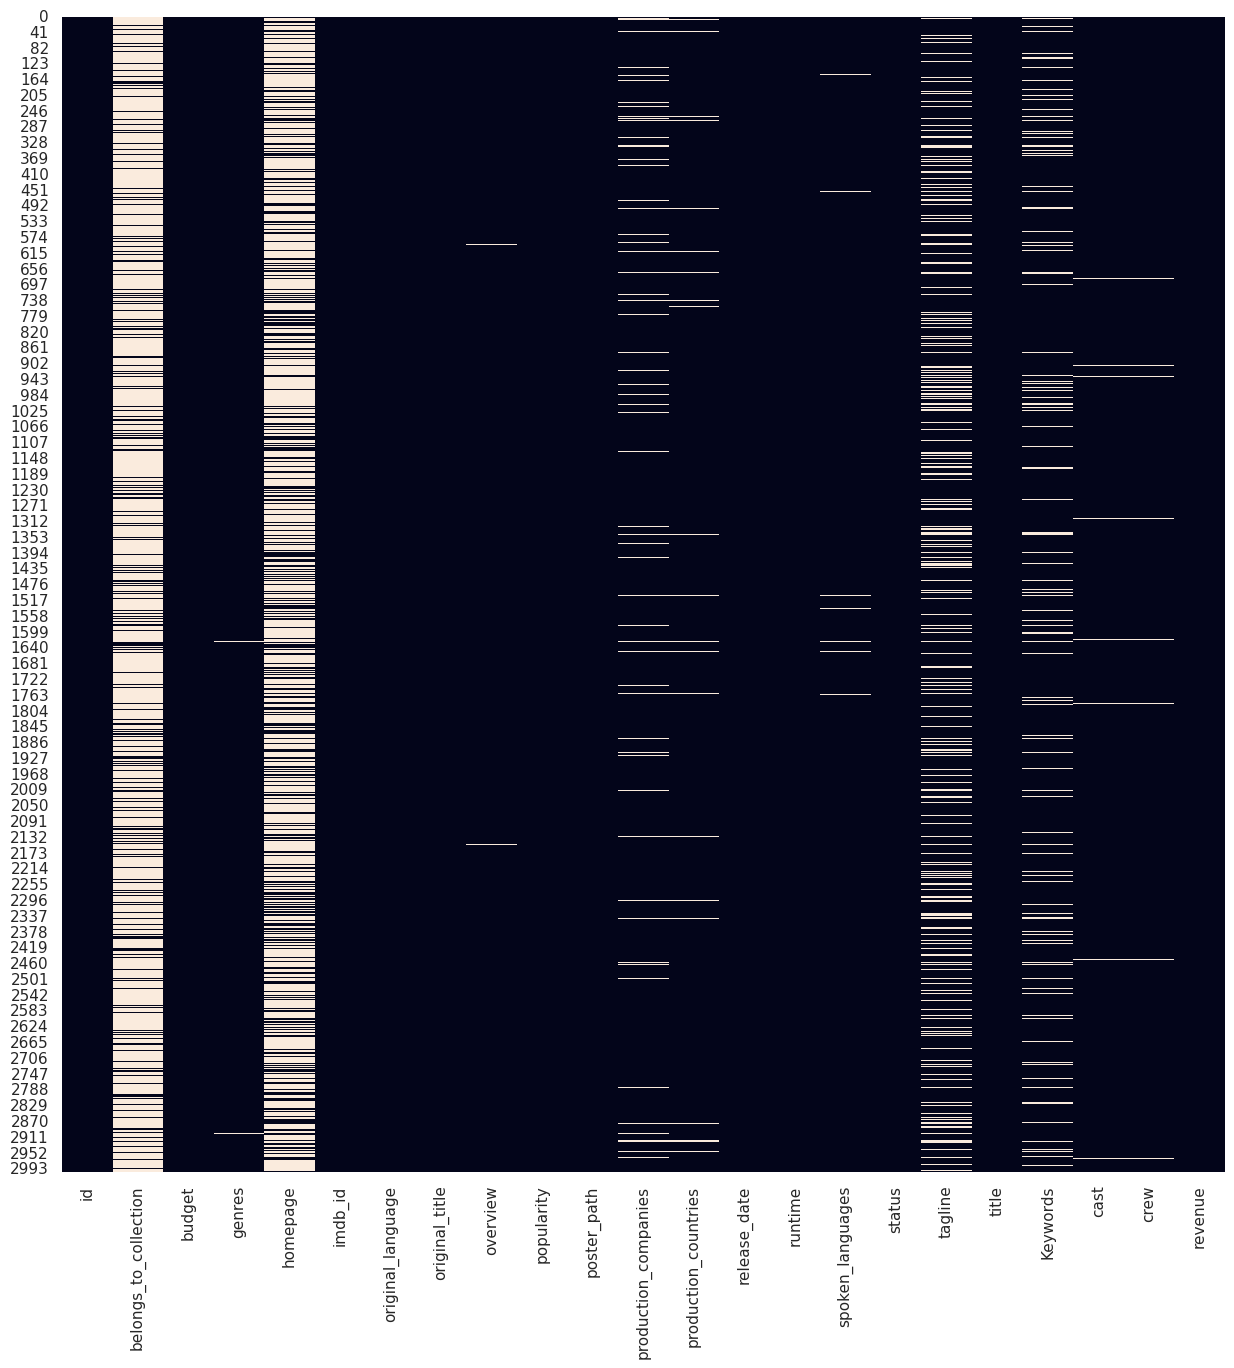

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False)

# Decomposing Date
And now we can decompose the date column to its attributes. Note we encode month and day as string variables as there isn't a numeric relationship within them. Days and months have fixed bounds (month doesn't go above 12, the day doesn't go above 31). Day number 10 and 31 are simply different days (think of them as categories).

Let's put year, month, and day into their own columns in the dataframe:

In [41]:
df['release_date'] = pd.to_datetime(df['release_date'])

# decomposition
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month.astype(str)
df['Day'] = df['release_date'].dt.day.astype(str)

df[['Year','Month','Day']].head()

,Year,Month,Day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


# Adjusting budget

Since the budget is highly right-skewed, we take the logarithm of the budget to adjust for it. Note we take the logarithm of the budget + 1 as a lot of movies have a budget of $0 and we cannot take the logarithm of 0.



In [42]:
# df = df[df['budget'] != 0]

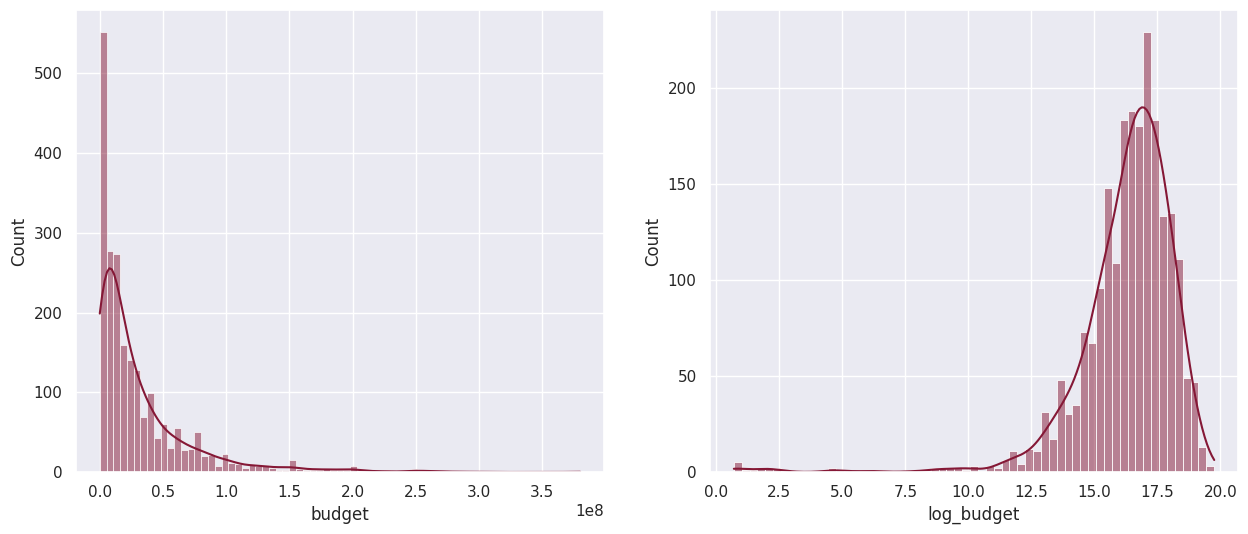

In [43]:
df['log_budget'] = np.log(df['budget'] + 1)

plot_hist(df['budget'], df['log_budget'])

# Encoding inflation

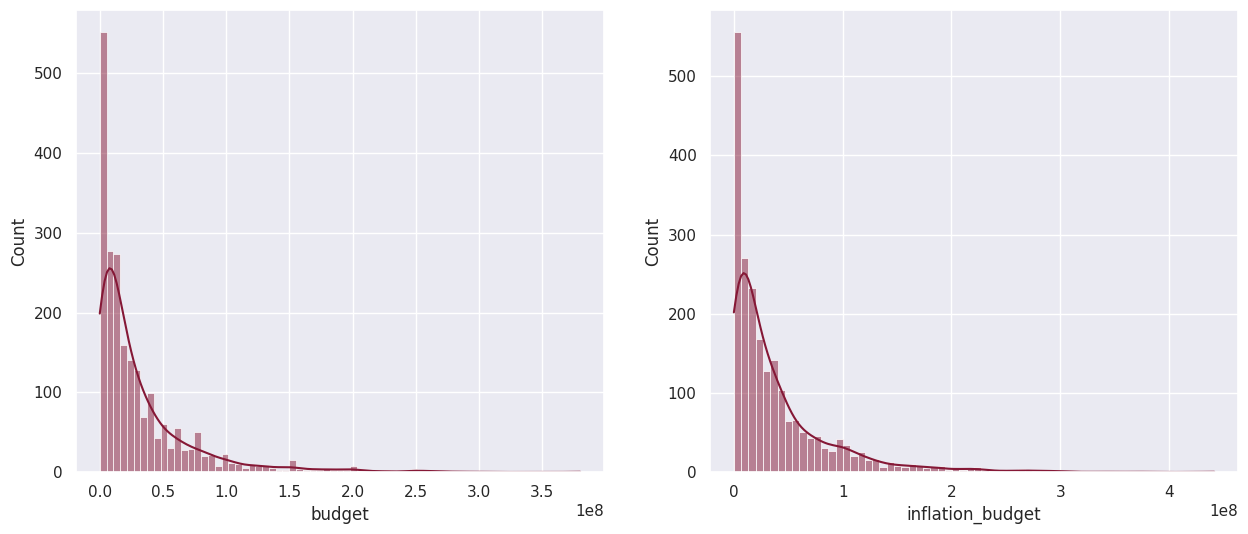

In [44]:
df['inflation_budget'] = df['budget'] * (1 + (0.018) * (2020 - df['Year']))

plot_hist(df['budget'], df['inflation_budget'])

# Other interesting/ weird features
Based on domain knowledge, we can create some useful ratio variables as shown below.

In [45]:
df['budget_runtime_ratio'] = df['budget'] / df['runtime']

df['budget_popularity_ratio'] = df['budget'] / df['popularity']

df['budget_year_ratio'] = df['budget'] / (df['Year'] * df['Year'])

df['releaseYear_popularity_ratio'] = df['Year'] / df['popularity']

# Indicator variables
We encode an indicator variable indicating whether a movie has a homepage or not, and whether the movie was in English:

In [46]:
df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,revenue,Year,Month,Day,log_budget,inflation_budget,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,releaseYear_popularity_ratio
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,12314651,2015,2,20,16.454568,1.526000e+07,150537.634409,2.129150e+06,3.448085,306.445562
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,95149435,2004,8,6,17.504390,5.152000e+07,353982.300885,4.849134e+06,9.960120,242.941630
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,13092000,2014,10,10,15.009433,3.656400e+06,31428.571429,5.132194e+04,0.813570,31.321933
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,16000000,2012,3,9,13.997833,1.372800e+06,9836.065574,3.779604e+05,0.296432,633.713561
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,3261638,1987,8,6,15.894952,1.275200e+07,96385.542169,1.076319e+07,2.026256,2673.307555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,2993,NaN,1135654,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0015400,en,The Thief of Bagdad,A recalcitrant thief vies with a duplicitous M...,3.878515,...,1213880,2024,3,18,13.942720,1.053887e+06,7621.838926,2.928064e+05,0.277220,521.849213
2993,2994,NaN,60000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.theterminal-themovie.com/,tt0362227,en,The Terminal,Viktor Navorski is a man without a country; hi...,14.092373,...,219417255,2004,6,17,17.909855,7.728000e+07,468750.000000,4.257622e+06,14.940180,142.204581
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,89456761,1996,10,11,17.989898,9.308000e+07,541666.666667,4.488223e+06,16.315196,137.822984
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,171963386,2004,1,16,17.553180,5.409600e+07,466666.666667,2.670814e+06,10.458126,127.435989


In [47]:
# Has a homepage
df['has_homepage'] = 1
df.loc[pd.isnull(df['homepage']), "has_homepage"] = 0

# Was in English
df['is_english'] = np.where(df['original_language']=='en', 1, 0)

In [48]:
# Fill remaining columns - categorical columns - with mode
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

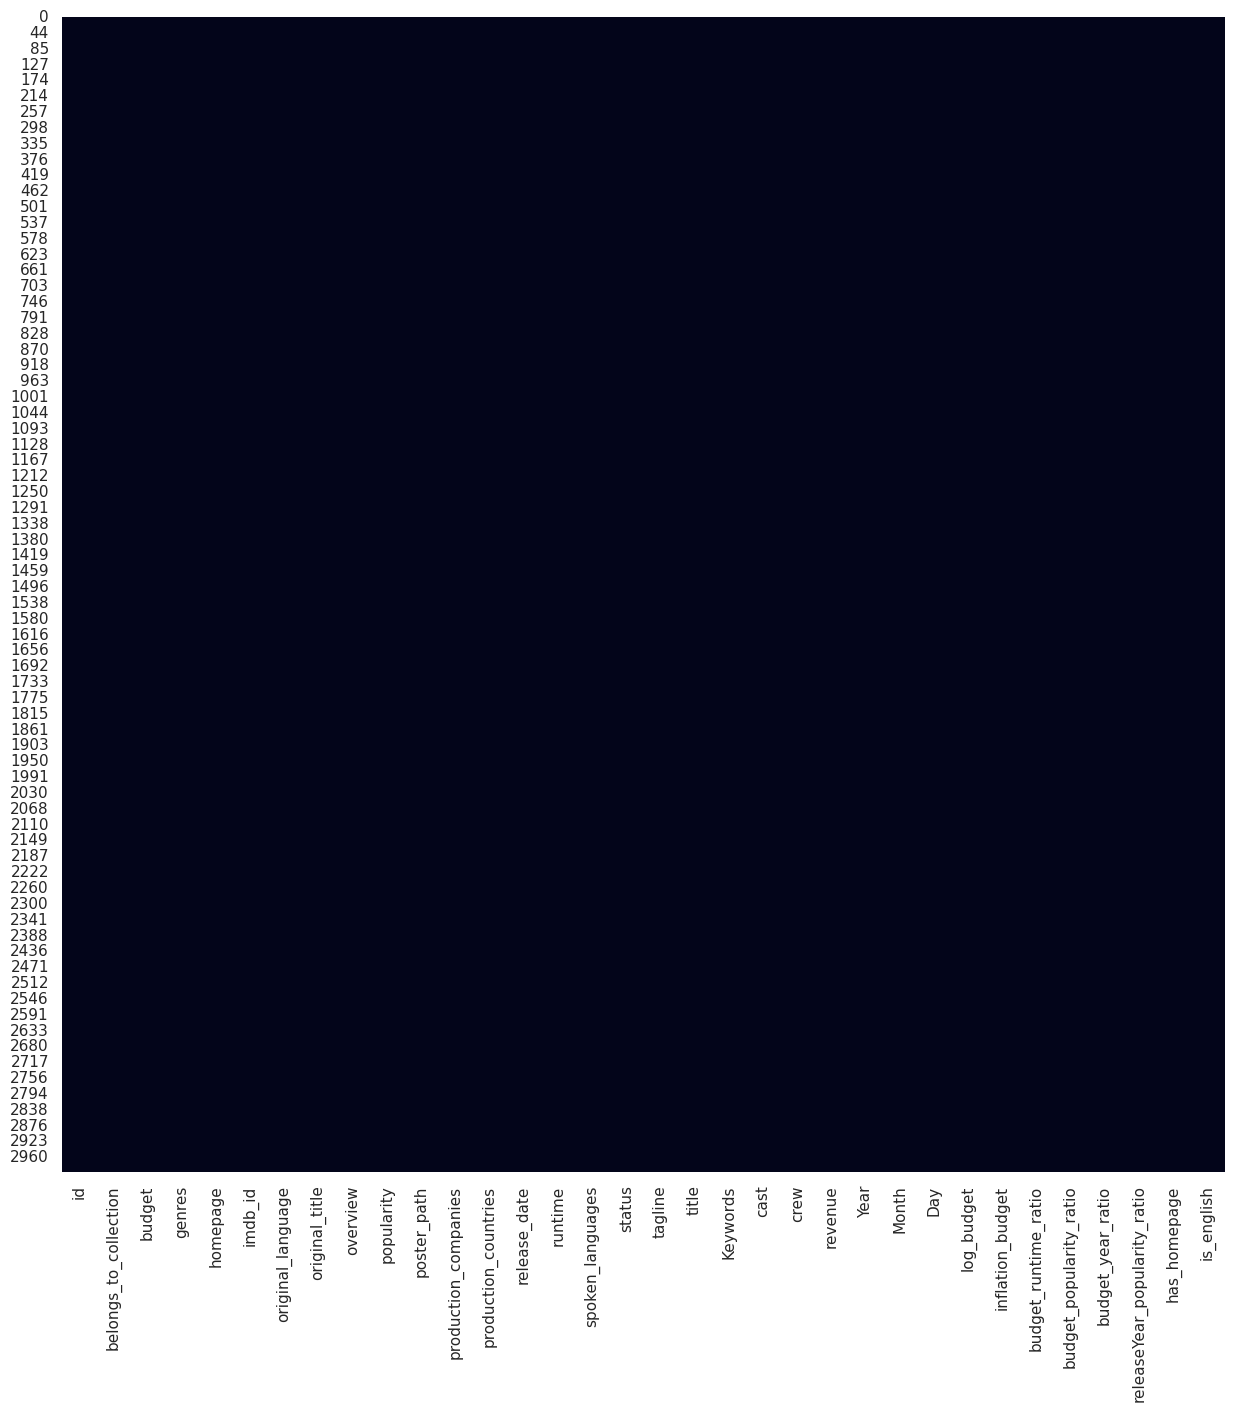

In [49]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

In [50]:
engineered_df = df[['budget_runtime_ratio',
                    'budget_popularity_ratio',
                    'budget_year_ratio',
                    'releaseYear_popularity_ratio',
                    'inflation_budget',
                    'Year',
                    'Month',
                    'is_english',
                    'has_homepage',
                    'budget',
                    'popularity',
                    'runtime',
                    'revenue']]

In [51]:
engineered_df.describe()

,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,releaseYear_popularity_ratio,inflation_budget,Year,is_english,has_homepage,budget,popularity,runtime,revenue
count,2.188000e+03,2.188000e+03,2.188000e+03,2.188000e+03,2.188000e+03,2188.000000,2188.000000,2188.000000,2.188000e+03,2188.000000,2188.000000,2.188000e+03
mean,inf,4.295752e+06,7.677897e+00,1.516564e+03,3.869466e+07,2006.500000,0.888026,0.353748,3.089305e+07,9.700621,110.083181,8.696605e+07
std,NaN,1.274101e+07,9.976627e+00,2.709444e+04,4.858333e+07,16.502387,0.315407,0.478241,4.026785e+07,13.753541,22.439278,1.554912e+08
min,7.142857e-03,1.225557e-01,2.367971e-07,6.852688e+00,3.700000e-01,1973.000000,0.000000,0.000000,1.000000e+00,0.001880,0.000000,1.000000e+00
25%,5.154639e+04,8.935232e+05,1.287812e+00,1.720050e+02,6.540000e+06,1998.000000,1.000000,0.000000,5.150000e+06,5.398055,95.750000,6.816828e+06
50%,1.562500e+05,2.314125e+06,4.004003e+00,2.409655e+02,2.162780e+07,2006.000000,1.000000,0.000000,1.600000e+07,8.323165,106.000000,2.891063e+07
75%,3.656562e+05,5.017385e+06,9.900745e+00,3.714569e+02,5.008000e+07,2012.000000,1.000000,1.000000,4.000000e+07,11.657305,121.000000,1.000342e+08
max,inf,4.320028e+08,9.396356e+01,1.063298e+06,4.415600e+08,2072.000000,1.000000,1.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [52]:
year_counts = engineered_df['Year'].value_counts()

In [53]:
year_counts

2010    100
2016     95
2013     95
2011     95
2015     88
       ... 
2044      1
2047      1
2026      1
2027      1
2024      1
Name: Year, Length: 87, dtype: int64

In [54]:
engineered_df['Year']<2018

0        True
1        True
2        True
3        True
5        True
        ...  
2992    False
2993     True
2997     True
2998     True
2999     True
Name: Year, Length: 2188, dtype: bool

In [55]:
engineered_df = engineered_df[engineered_df['Year']<2018]

In [56]:
engineered_df

,budget_runtime_ratio,budget_popularity_ratio,budget_year_ratio,releaseYear_popularity_ratio,inflation_budget,Year,Month,is_english,has_homepage,budget,popularity,runtime,revenue
0,150537.634409,2.129150e+06,3.448085,306.445562,15260000.0,2015,2,1,0,14000000,6.575393,93.0,12314651
1,353982.300885,4.849134e+06,9.960120,242.941630,51520000.0,2004,8,1,0,40000000,8.248895,113.0,95149435
2,31428.571429,5.132194e+04,0.813570,31.321933,3656400.0,2014,10,1,1,3300000,64.299990,105.0,13092000
3,9836.065574,3.779604e+05,0.296432,633.713561,1372800.0,2012,3,0,1,1200000,3.174936,122.0,16000000
5,96385.542169,1.076319e+07,2.026256,2673.307555,12752000.0,1987,8,1,0,8000000,0.743274,83.0,3261638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,116071.428571,2.711673e+06,3.246752,417.389084,17446000.0,2001,1,1,0,13000000,4.794088,112.0,91038276
2993,468750.000000,4.257622e+06,14.940180,142.204581,77280000.0,2004,6,1,1,60000000,14.092373,128.0,219417255
2997,541666.666667,4.488223e+06,16.315196,137.822984,93080000.0,1996,10,1,0,65000000,14.482345,120.0,89456761
2998,466666.666667,2.670814e+06,10.458126,127.435989,54096000.0,2004,1,1,1,42000000,15.725542,90.0,171963386


In [57]:
engineered_df = engineered_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
engineered_df = pd.get_dummies(engineered_df)

In [58]:
engineered_df.head()

,budget_popularity_ratio,budget_year_ratio,releaseYear_popularity_ratio,inflation_budget,Year,is_english,has_homepage,budget,popularity,runtime,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,2.129150e+06,3.448085,306.445562,15260000.0,2015,1,0,14000000,6.575393,93.0,...,0,0,1,0,0,0,0,0,0,0
1,4.849134e+06,9.960120,242.941630,51520000.0,2004,1,0,40000000,8.248895,113.0,...,0,0,0,0,0,0,0,0,1,0
2,5.132194e+04,0.813570,31.321933,3656400.0,2014,1,1,3300000,64.299990,105.0,...,0,0,0,0,0,0,0,0,0,0
3,3.779604e+05,0.296432,633.713561,1372800.0,2012,0,1,1200000,3.174936,122.0,...,0,0,0,1,0,0,0,0,0,0
5,1.076319e+07,2.026256,2673.307555,12752000.0,1987,1,0,8000000,0.743274,83.0,...,0,0,0,0,0,0,0,0,1,0


# Prediction
To prove feature engineering works, and improves the performance of the model, we can build a simple regression model to predict the revenue of movies.

Normally we pick what features to use via a process called feature selection, however, since this article is focused on feature engineering, we will employ a simple process of selecting features: correlation analysis.

By plotting the correlation matrix (below), we see most of the features we created aren't that predictive of revenue. This is what happens most of the time - you build a ton of features, but only a few end up being useful - but those features that are useful make a difference.

From the plot below we will use has_homepage, budget_year_ratio, and is_english in our model, in addition to features that came before feature engineering - budget,runtime and popularity.

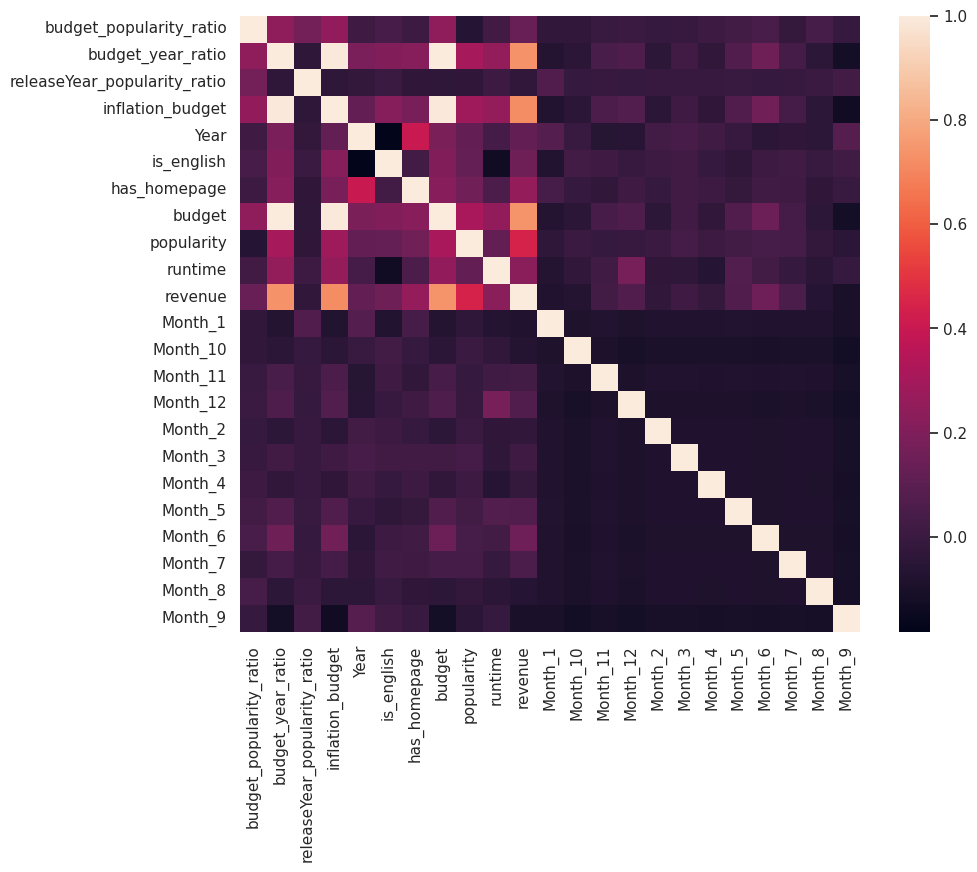

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(engineered_df.corr());

In [66]:
train_engineered = engineered_df[['budget','runtime','popularity',
                                'has_homepage','budget_year_ratio','is_english']].iloc[:1800]

train_baseline = engineered_df[['budget','runtime','popularity']].iloc[:1800]

test_engineered = engineered_df[['budget','runtime','popularity',
                                'has_homepage','budget_year_ratio','is_english']].iloc[1800:]

test_baseline = engineered_df[['budget','runtime','popularity']].iloc[1800:]


target_train = np.log(engineered_df['revenue'].iloc[:1800])
target_test = np.log(engineered_df['revenue'].iloc[1800:])

In [67]:
test_baseline

,budget,runtime,popularity
2643,37000000,96.0,7.558125
2644,105000000,129.0,14.412644
2647,145000000,133.0,14.258430
2648,65000000,103.0,12.366641
2650,7000000,97.0,9.218164
...,...,...,...
2991,13000000,112.0,4.794088
2993,60000000,128.0,14.092373
2997,65000000,120.0,14.482345
2998,42000000,90.0,15.725542


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [71]:
reg_baseline = LinearRegression()
reg_baseline.fit(train_baseline, target_train)
reg_predict_baseline = reg_baseline.predict(test_baseline)

reg_engineered = LinearRegression().fit(train_engineered, target_train)
reg_predict_engineered = reg_engineered.predict(test_engineered)


rmse_baseline = np.sqrt(mean_squared_error(target_test, reg_predict_baseline))
print(rmse_baseline)

rmse_engineered = np.sqrt(mean_squared_error(target_test, reg_predict_engineered))
print(rmse_engineered)

rmse_difference = rmse_baseline - rmse_engineered

print ("The difference in RMSE is", round(rmse_difference, 2))

1.7041043331799395
1.6503961859513172
The difference in RMSE is 0.05


## Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_baseline = RandomForestRegressor()
rf_baseline.fit(train_baseline, target_train)
rf_predict_baseline = rf_baseline.predict(test_baseline)

rf_engineered = RandomForestRegressor().fit(train_engineered, target_train)
rf_predict_engineered = rf_engineered.predict(test_engineered)

rmse_rf_baseline = np.sqrt(mean_squared_error(target_test, rf_predict_baseline))
print(rmse_rf_baseline)

rmse_rf_engineered = np.sqrt(mean_squared_error(target_test, rf_predict_engineered))
print(rmse_rf_engineered)

rmse_rf_difference = rmse_rf_baseline - rmse_rf_engineered

print ("The difference in RMSE for Random Forest is", round(rmse_rf_difference, 2))

1.6860634968746406
1.648305426807338
The difference in RMSE for Random Forest is 0.04


## Extreme Gradient Boosting

In [73]:
import xgboost as xgb

xgb_baseline = xgb.XGBRegressor()
xgb_baseline.fit(train_baseline, target_train)
xgb_predict_baseline = xgb_baseline.predict(test_baseline)

xgb_engineered = xgb.XGBRegressor().fit(train_engineered, target_train)
xgb_predict_engineered = xgb_engineered.predict(test_engineered)

rmse_xgb_baseline = np.sqrt(mean_squared_error(target_test, xgb_predict_baseline))
print(rmse_xgb_baseline)

rmse_xgb_engineered = np.sqrt(mean_squared_error(target_test, xgb_predict_engineered))
print(rmse_xgb_engineered)

rmse_xgb_difference = rmse_xgb_baseline - rmse_xgb_engineered

print ("The difference in RMSE for XGBoost is", round(rmse_xgb_difference, 2))

1.7617265939149915
1.5720650067121562
The difference in RMSE for XGBoost is 0.19


## LightGBM

In [74]:
import lightgbm as lgb

lgb_baseline = lgb.LGBMRegressor()
lgb_baseline.fit(train_baseline, target_train)
lgb_predict_baseline = lgb_baseline.predict(test_baseline)

lgb_engineered = lgb.LGBMRegressor().fit(train_engineered, target_train)
lgb_predict_engineered = lgb_engineered.predict(test_engineered)

rmse_lgb_baseline = np.sqrt(mean_squared_error(target_test, lgb_predict_baseline))
print(rmse_lgb_baseline)

rmse_lgb_engineered = np.sqrt(mean_squared_error(target_test, lgb_predict_engineered))
print(rmse_lgb_engineered)

rmse_lgb_difference = rmse_lgb_baseline - rmse_lgb_engineered

print ("The difference in RMSE for LightGBM is", round(rmse_lgb_difference, 2))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 3
[LightGBM] [Info] Start training from score 16.767594
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 6
[LightGBM] [Info] Start training from score 16.767594
1.5823823712403493
1.6005755647297923
The difference in RMSE for LightGBM is -0.02


## Catboost

In [75]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [76]:
from catboost import CatBoostRegressor

# Define the baseline model
cat_baseline = CatBoostRegressor()
cat_baseline.fit(train_baseline, target_train, verbose=0)

# Make predictions with the baseline model
cat_predict_baseline = cat_baseline.predict(test_baseline)

# Define the engineered model
cat_engineered = CatBoostRegressor()
cat_engineered.fit(train_engineered, target_train, verbose=0)

# Make predictions with the engineered model
cat_predict_engineered = cat_engineered.predict(test_engineered)

# Compute the RMSE
rmse_cat_baseline = np.sqrt(mean_squared_error(target_test, cat_predict_baseline))
print(rmse_cat_baseline)

rmse_cat_engineered = np.sqrt(mean_squared_error(target_test, cat_predict_engineered))
print(rmse_cat_engineered)

rmse_cat_difference = rmse_cat_baseline - rmse_cat_engineered

print ("The difference in RMSE for CatBoost is", round(rmse_cat_difference, 2))

1.5491252602200034
1.5702488149010472
The difference in RMSE for CatBoost is -0.02


## Neural Network

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
train_baseline_scaled = scaler.fit_transform(train_baseline)
test_baseline_scaled = scaler.transform(test_baseline)
train_engineered_scaled = scaler.fit_transform(train_engineered)
test_engineered_scaled = scaler.transform(test_engineered)

# Define the baseline model
model_baseline = Sequential([
    Dense(64, activation='relu', input_shape=(train_baseline.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the baseline model
model_baseline.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Fit the baseline model
history_baseline = model_baseline.fit(train_baseline_scaled, target_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions with the baseline model
nn_predict_baseline = model_baseline.predict(test_baseline_scaled)

# Define the engineered model
model_engineered = Sequential([
    Dense(64, activation='relu', input_shape=(train_engineered.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the engineered model
model_engineered.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Fit the engineered model
history_engineered = model_engineered.fit(train_engineered_scaled, target_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions with the engineered model
nn_predict_engineered = model_engineered.predict(test_engineered_scaled)

# Compute the RMSE
rmse_nn_baseline = np.sqrt(mean_squared_error(target_test, nn_predict_baseline))
print(rmse_nn_baseline)

rmse_nn_engineered = np.sqrt(mean_squared_error(target_test, nn_predict_engineered))
print(rmse_nn_engineered)

rmse_nn_difference = rmse_nn_baseline - rmse_nn_engineered

print ("The difference in RMSE for Neural Network is", round(rmse_nn_difference, 2))

8/8 [==============================] - 0s 5ms/step
1.4815268409711324
1.5035979091517815
The difference in RMSE for Neural Network is -0.02


# Secret weapon: TabNet (Neural Network + Transformer-like attention mechanism),introduced just over two years ago

We will learn Transformer later on

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetRegressor

# Convert the data to PyTorch tensors
train_baseline_tensor = torch.tensor(train_baseline.values.astype(np.float32))
test_baseline_tensor = torch.tensor(test_baseline.values.astype(np.float32))
train_engineered_tensor = torch.tensor(train_engineered.values.astype(np.float32))
test_engineered_tensor = torch.tensor(test_engineered.values.astype(np.float32))
target_train_tensor = torch.tensor(target_train.values.astype(np.float32)).reshape(-1, 1)
target_test_tensor = torch.tensor(target_test.values.astype(np.float32)).reshape(-1, 1)


In [ ]:
# Define the TabNet model
tabnet_baseline = TabNetRegressor()
tabnet_engineered = TabNetRegressor()

# Fit the baseline model
tabnet_baseline.fit(X_train=train_baseline_tensor.detach().numpy(), y_train=target_train_tensor.detach().numpy(), eval_set=[(test_baseline_tensor.detach().numpy(), target_test_tensor.detach().numpy())], patience=100, batch_size=1024)

# Make predictions with the baseline model
tabnet_predict_baseline = tabnet_baseline.predict(test_baseline_tensor.detach().numpy())

# Fit the engineered model
tabnet_engineered.fit(X_train=train_engineered_tensor.detach().numpy(), y_train=target_train_tensor.detach().numpy(), eval_set=[(test_engineered_tensor.detach().numpy(), target_test_tensor.detach().numpy())], patience=100, batch_size=1024)

# Make predictions with the engineered model
tabnet_predict_engineered = tabnet_engineered.predict(test_engineered_tensor.detach().numpy())

# Compute the RMSE
rmse_tabnet_baseline = np.sqrt(mean_squared_error(target_test, tabnet_predict_baseline))
print(rmse_tabnet_baseline)

rmse_tabnet_engineered = np.sqrt(mean_squared_error(target_test, tabnet_predict_engineered))
print(rmse_tabnet_engineered)

rmse_tabnet_difference = rmse_tabnet_baseline - rmse_tabnet_engineered

print ("The difference in RMSE for TabNet is", round(rmse_tabnet_difference, 2))

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 277.1358| val_0_mse: 532.2809448242188|  0:00:00s
epoch 1  | loss: 251.17528| val_0_mse: 452.84698486328125|  0:00:00s
epoch 2  | loss: 231.82024| val_0_mse: 361.8426818847656|  0:00:00s
epoch 3  | loss: 213.66294| val_0_mse: 353.48193359375|  0:00:00s
epoch 4  | loss: 195.11334| val_0_mse: 345.4955139160156|  0:00:00s
epoch 5  | loss: 178.66122| val_0_mse: 502.4039306640625|  0:00:01s
epoch 6  | loss: 160.86776| val_0_mse: 486.7548522949219|  0:00:01s
epoch 7  | loss: 142.48531| val_0_mse: 539.09228515625|  0:00:01s
epoch 8  | loss: 123.55547| val_0_mse: 519.2517700195312|  0:00:01s
epoch 9  | loss: 105.18153| val_0_mse: 426.8709716796875|  0:00:01s
epoch 10 | loss: 86.96507| val_0_mse: 405.27923583984375|  0:00:01s
epoch 11 | loss: 71.30604| val_0_mse: 362.50396728515625|  0:00:02s
epoch 12 | loss: 54.74927| val_0_mse: 329.3697204589844|  0:00:02s
epoch 13 | loss: 39.66906| val_0_mse: 303.07513427734375|  0:00:02s
epoch 14 | loss: 26.45334| val_0_mse: 294.91488647460

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 252.92017| val_0_mse: 644.9249877929688|  0:00:00s
epoch 1  | loss: 217.24918| val_0_mse: 4163.404296875|  0:00:00s
epoch 2  | loss: 192.36314| val_0_mse: 5163.0595703125|  0:00:00s
epoch 3  | loss: 169.09724| val_0_mse: 6662.05908203125|  0:00:00s
epoch 4  | loss: 143.92576| val_0_mse: 3624.3330078125|  0:00:00s
epoch 5  | loss: 118.94789| val_0_mse: 2639.583251953125|  0:00:01s
epoch 6  | loss: 97.03745| val_0_mse: 518.6924438476562|  0:00:01s
epoch 7  | loss: 74.22847| val_0_mse: 443.3818664550781|  0:00:01s
epoch 8  | loss: 53.83401| val_0_mse: 479.8362121582031|  0:00:02s
epoch 9  | loss: 36.64985| val_0_mse: 531.9984741210938|  0:00:02s
epoch 10 | loss: 22.60409| val_0_mse: 519.3662109375|  0:00:02s
epoch 11 | loss: 12.90768| val_0_mse: 611.9035034179688|  0:00:02s
epoch 12 | loss: 8.75782 | val_0_mse: 590.6781005859375|  0:00:03s
epoch 13 | loss: 9.47377 | val_0_mse: 579.4291381835938|  0:00:03s
epoch 14 | loss: 11.51558| val_0_mse: 510.6143493652344|  0:00:03s


/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
